In [1]:
from movies_datamodule import MLDataModule

/work/hpc/miniconda3/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from typing import Any, Dict, Optional, Tuple

import torch
from lightning import LightningDataModule
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.transforms import Compose
from torchvision import transforms


In [3]:
datamodule: LightningDataModule = MLDataModule(data_dir="/work/hpc/potato/movies/data/movies/dataset",
                                                   img_dir="/work/hpc/potato/movies/data/movies/dataset/ml1m-images/",
                                                   genre_path="/work/hpc/potato/movies/data/movies/dataset/genres.txt",
                                                   word_path="/work/hpc/potato/movies/data/movies/dataset/words.txt",
                                                   max_seq_len=10,
                                                   rating_transforms=Compose([torch.FloatTensor,
                                                                              transforms.Normalize(mean=[0.5, 3, 10, 2.5],
                                                                                                   std=[0.5, 3, 10, 2.5])]),
                                                   transforms=Compose([ transforms.RandomAffine(degrees=(-10, 10),
                                                                                                translate=(0.1, 0.1),
                                                                                                interpolation=transforms.InterpolationMode.NEAREST),
                                                                        transforms.Resize((256, 256)),
                                                                        transforms.ToTensor()]),
                                                   test_transforms=Compose([transforms.Resize((256, 256)), 
                                                                            transforms.ToTensor()]),
                                                   rating_img_size= 64,
                                                   img_size=256,
                                                   batch_size=8,
                                                   num_workers=4,
                                                   pin_memory=False)

In [4]:
datamodule.setup()
dataloader = datamodule.test_dataloader()
batch = next(iter(dataloader))
print(batch['titles'])

3106
777
777
tensor([[1691, 2391, 1503, 1924,    0,    0,    0,    0,    0,    0],
        [3320,  632,    0,    0,    0,    0,    0,    0,    0,    0],
        [3702, 3212, 1924, 1961, 4465,    0,    0,    0,    0,    0],
        [3653, 1876, 2358,  536,    0,    0,    0,    0,    0,    0],
        [4343, 1924,  514,    0,    0,    0,    0,    0,    0,    0],
        [3425,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1961,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [1546,  551, 2581, 1924, 2410,  855,    0,    0,    0,    0]])


In [5]:
rating_img = batch['ratings'][0].permute(1, 2, 0).numpy()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
rating_img = np.interp(batch['ratings'][2].permute(1, 2, 0).numpy()[:, :, :3], (-1, 1), (0, 1))

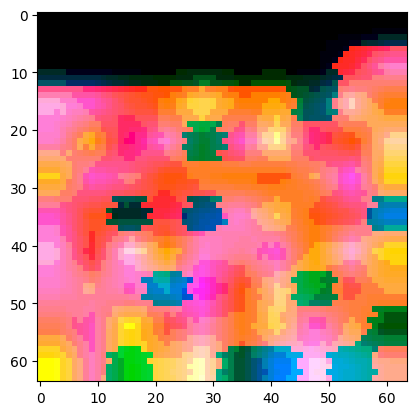

In [18]:
plt.imshow(rating_img)